# Imports and configs

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('./data/all_games.csv')

Undermentioned method overwrites every csv with league name column so it will be much easier for me later on to fill empties while grouping tables.

In [46]:
data_folder = './data'

for entry in os.listdir(data_folder):
    entry_path = os.path.join(data_folder, entry)
    if os.path.isdir(entry_path):
        for file_name in os.listdir(entry_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(entry_path, file_name)
                df = pd.read_csv(file_path)
                df['league'] = entry
                df.to_csv(file_path, index=False)

In [47]:
data = pd.DataFrame()

for folder in os.listdir('./data'):
    if folder.endswith('csv'):
        continue
    for file in os.listdir(f'./data/{folder}'):
        df = pd.read_csv(f'./data/{folder}/{file}')
        data = pd.concat([data, df], ignore_index=True)

In [48]:
data.to_csv('./data/all_games.csv')

In [49]:
data = pd.read_csv('./data/all_games.csv')

# Basic data glimpse

In [50]:
data.shape

(56249, 68)

In [51]:
data.head()

,Unnamed: 0,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,league
0,0,1249669800,Aug 07 2009 - 6:30pm,complete,NaN,Wolfsburg,Stuttgart,Felix Brych,1.0,0.0,0.0,1.35,1.53,2,0,2,0,0,0,"71,82",NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VOLKSWAGEN ARENA (Wolfsburg),bundesliga
1,1,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Borussia Dortmund,Köln,Wolfgang Stark,1.0,0.0,0.0,2.00,1.35,1,0,1,0,0,0,75,NaN,-1,-1,0,0,1,0,0,0,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Signal-Iduna-Park (Dortmund),bundesliga
2,2,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Nürnberg,Schalke 04,Knut Kircher,1.0,0.0,0.0,1.12,1.76,1,2,3,1,0,1,88,"36,50",-1,-1,2,0,1,0,1,1,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Max-Morlock-Stadion (Nürnberg),bundesliga
3,3,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Werder Bremen,Eintracht Frankfurt,NaN,1.0,0.0,0.0,1.76,1.18,2,3,5,4,2,2,"13,44","6,42,71",-1,-1,2,1,2,0,1,2,0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wohninvest WESERSTADION (Bremen),bundesliga
4,4,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Hertha BSC,Hannover 96,Guido Winkmann,1.0,0.0,0.0,0.53,0.82,1,0,1,0,0,0,82,NaN,-1,-1,3,0,2,0,0,3,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olympiastadion Berlin (Berlin),bundesliga


In [53]:
data.isna().sum()

Unnamed: 0                                 0
timestamp                                  0
date_GMT                                   0
status                                     0
attendance                             17725
home_team_name                             0
away_team_name                             0
referee                                22289
Game Week                               1471
Pre-Match PPG (Home)                       0
Pre-Match PPG (Away)                       0
home_ppg                                   0
away_ppg                                   0
home_team_goal_count                       0
away_team_goal_count                       0
total_goal_count                           0
total_goals_at_half_time                   0
home_team_goal_count_half_time             0
away_team_goal_count_half_time             0
home_team_goal_timings                 13155
away_team_goal_timings                 18427
home_team_corner_count                     0
away_team_

In [54]:
data.dtypes

Unnamed: 0                               int64
timestamp                                int64
date_GMT                                object
status                                  object
attendance                             float64
home_team_name                          object
away_team_name                          object
referee                                 object
Game Week                              float64
Pre-Match PPG (Home)                   float64
Pre-Match PPG (Away)                   float64
home_ppg                               float64
away_ppg                               float64
home_team_goal_count                     int64
away_team_goal_count                     int64
total_goal_count                         int64
total_goals_at_half_time                 int64
home_team_goal_count_half_time           int64
away_team_goal_count_half_time           int64
home_team_goal_timings                  object
away_team_goal_timings                  object
home_team_cor

## Missingno matrix

The missingno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

<Axes: >

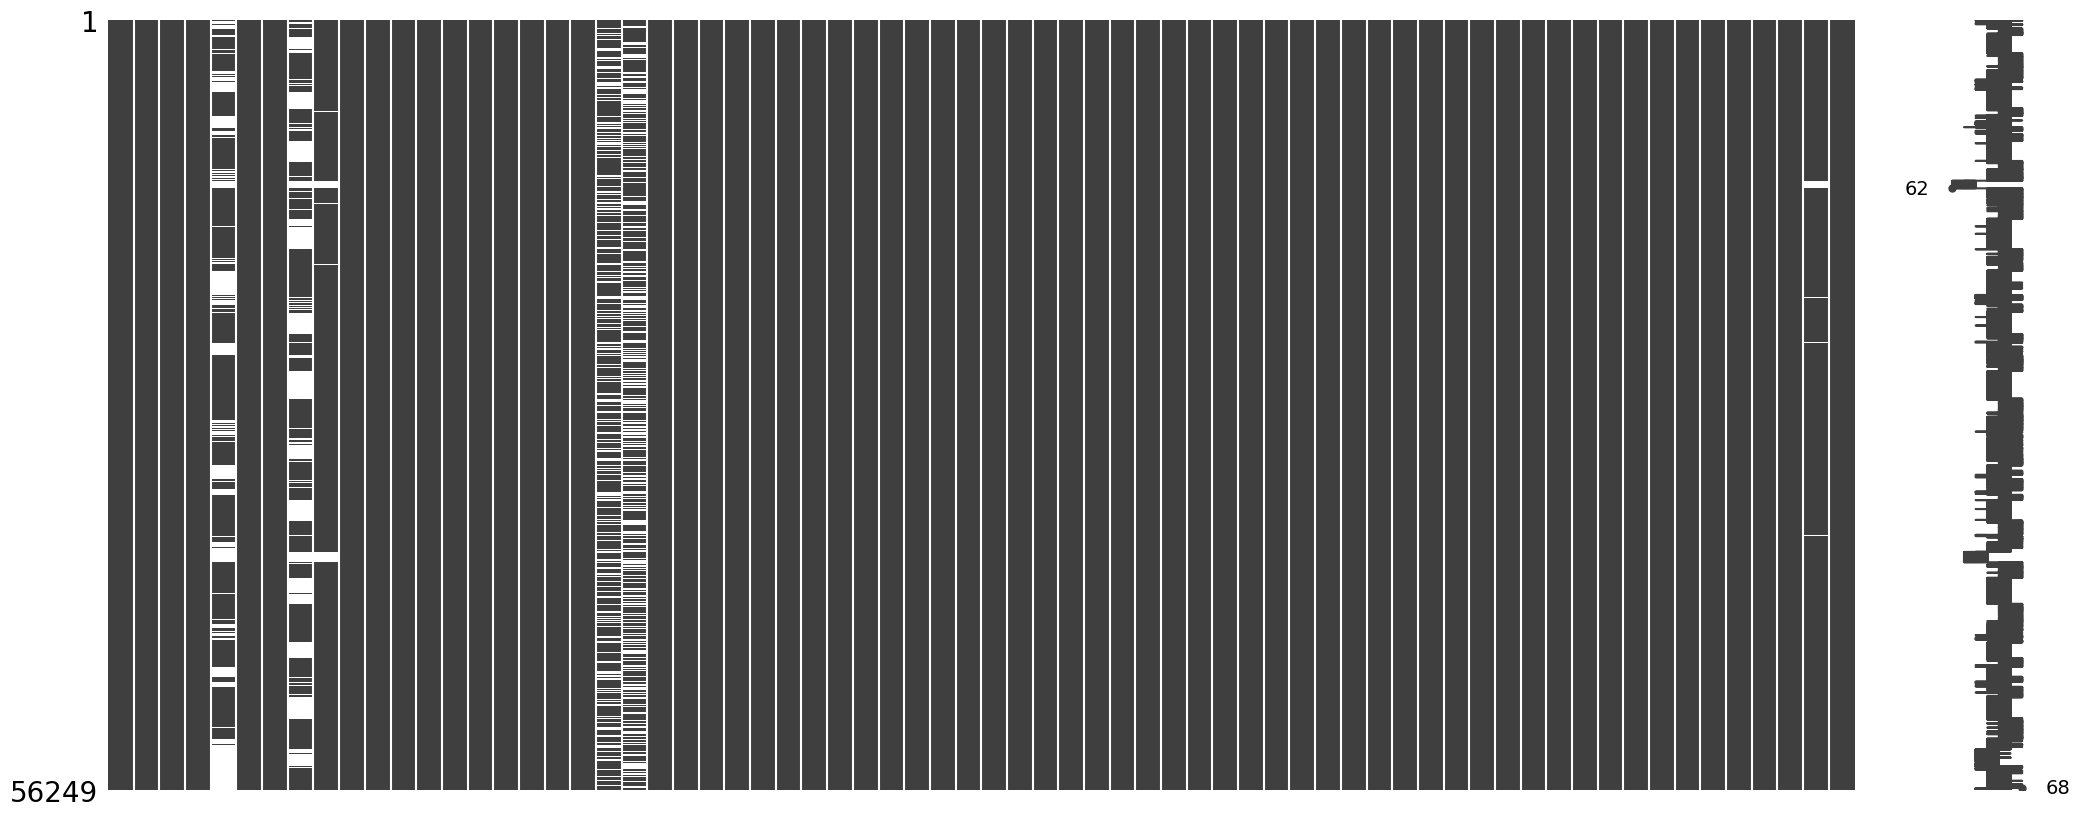

In [55]:
missingno.matrix(data)

## Missingno correlation matrix
The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

<Axes: >

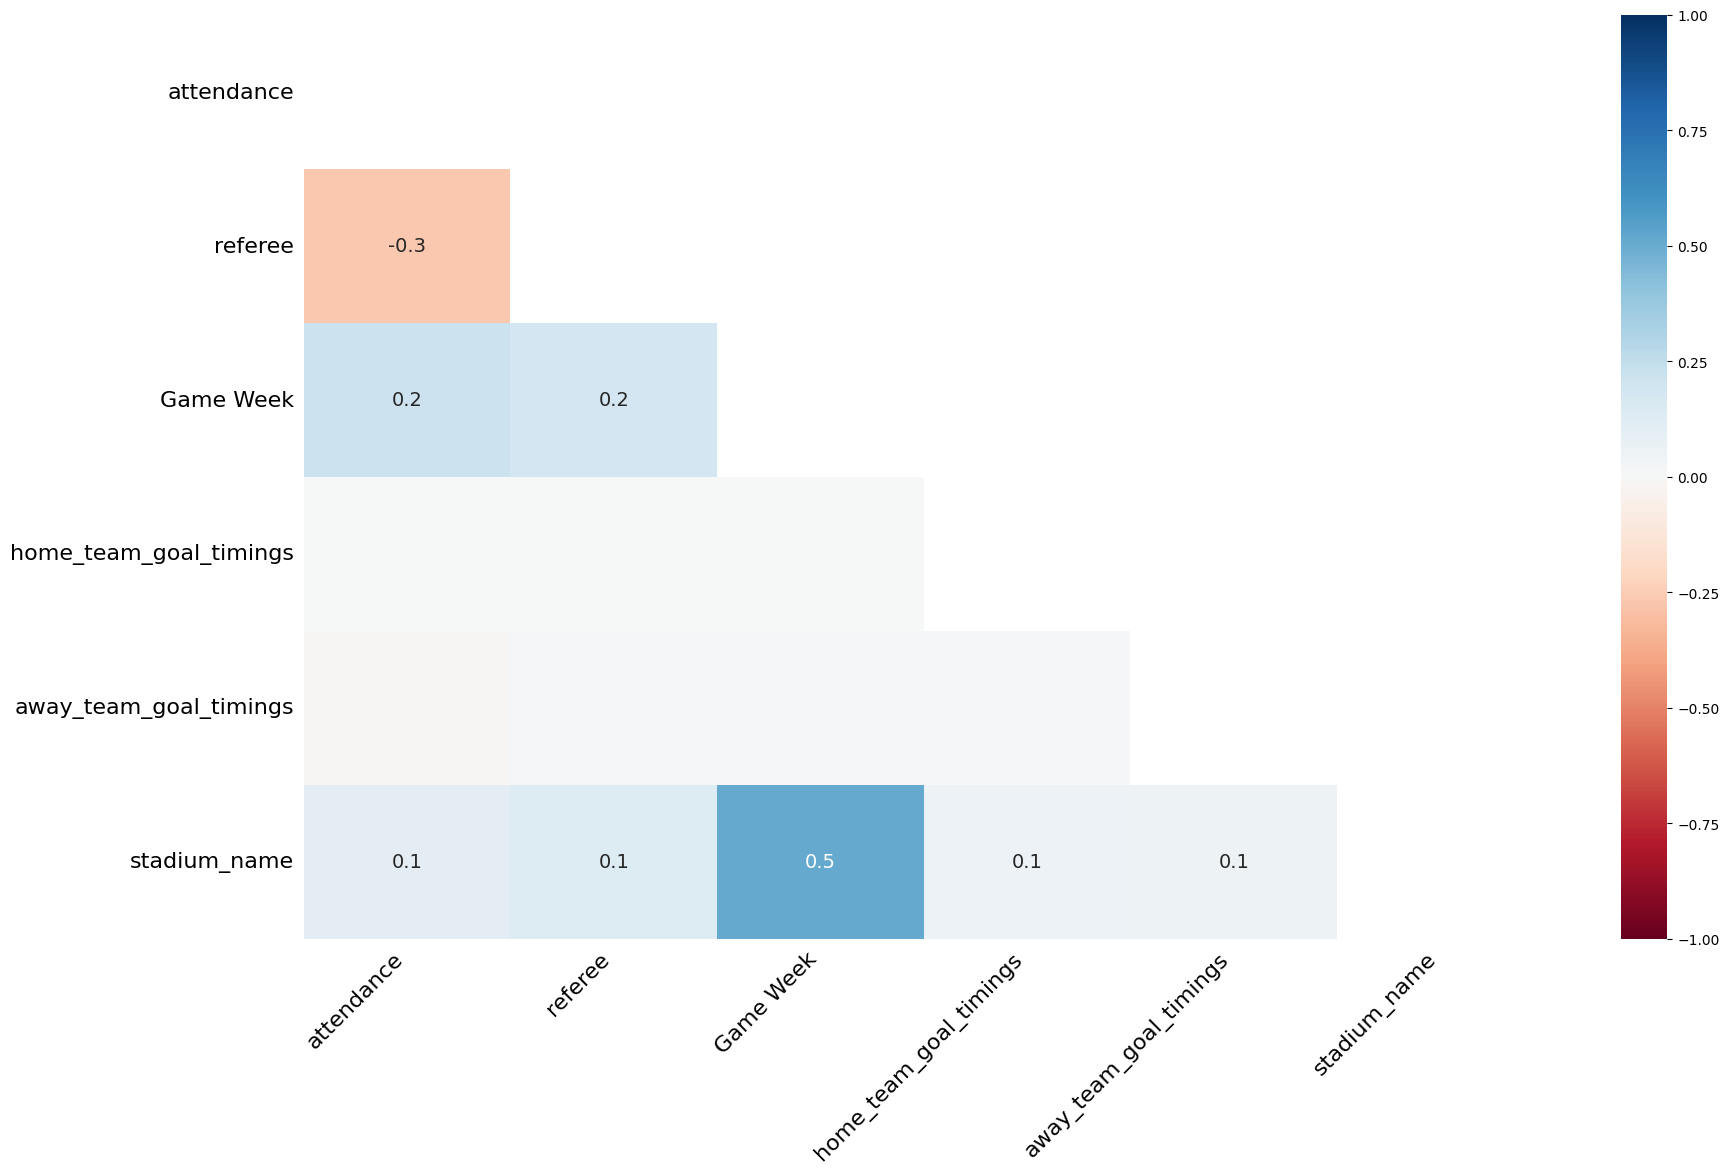

In [56]:
missingno.heatmap(data)

## Missingno dendrogram

The dendrogram allows to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

<Axes: >

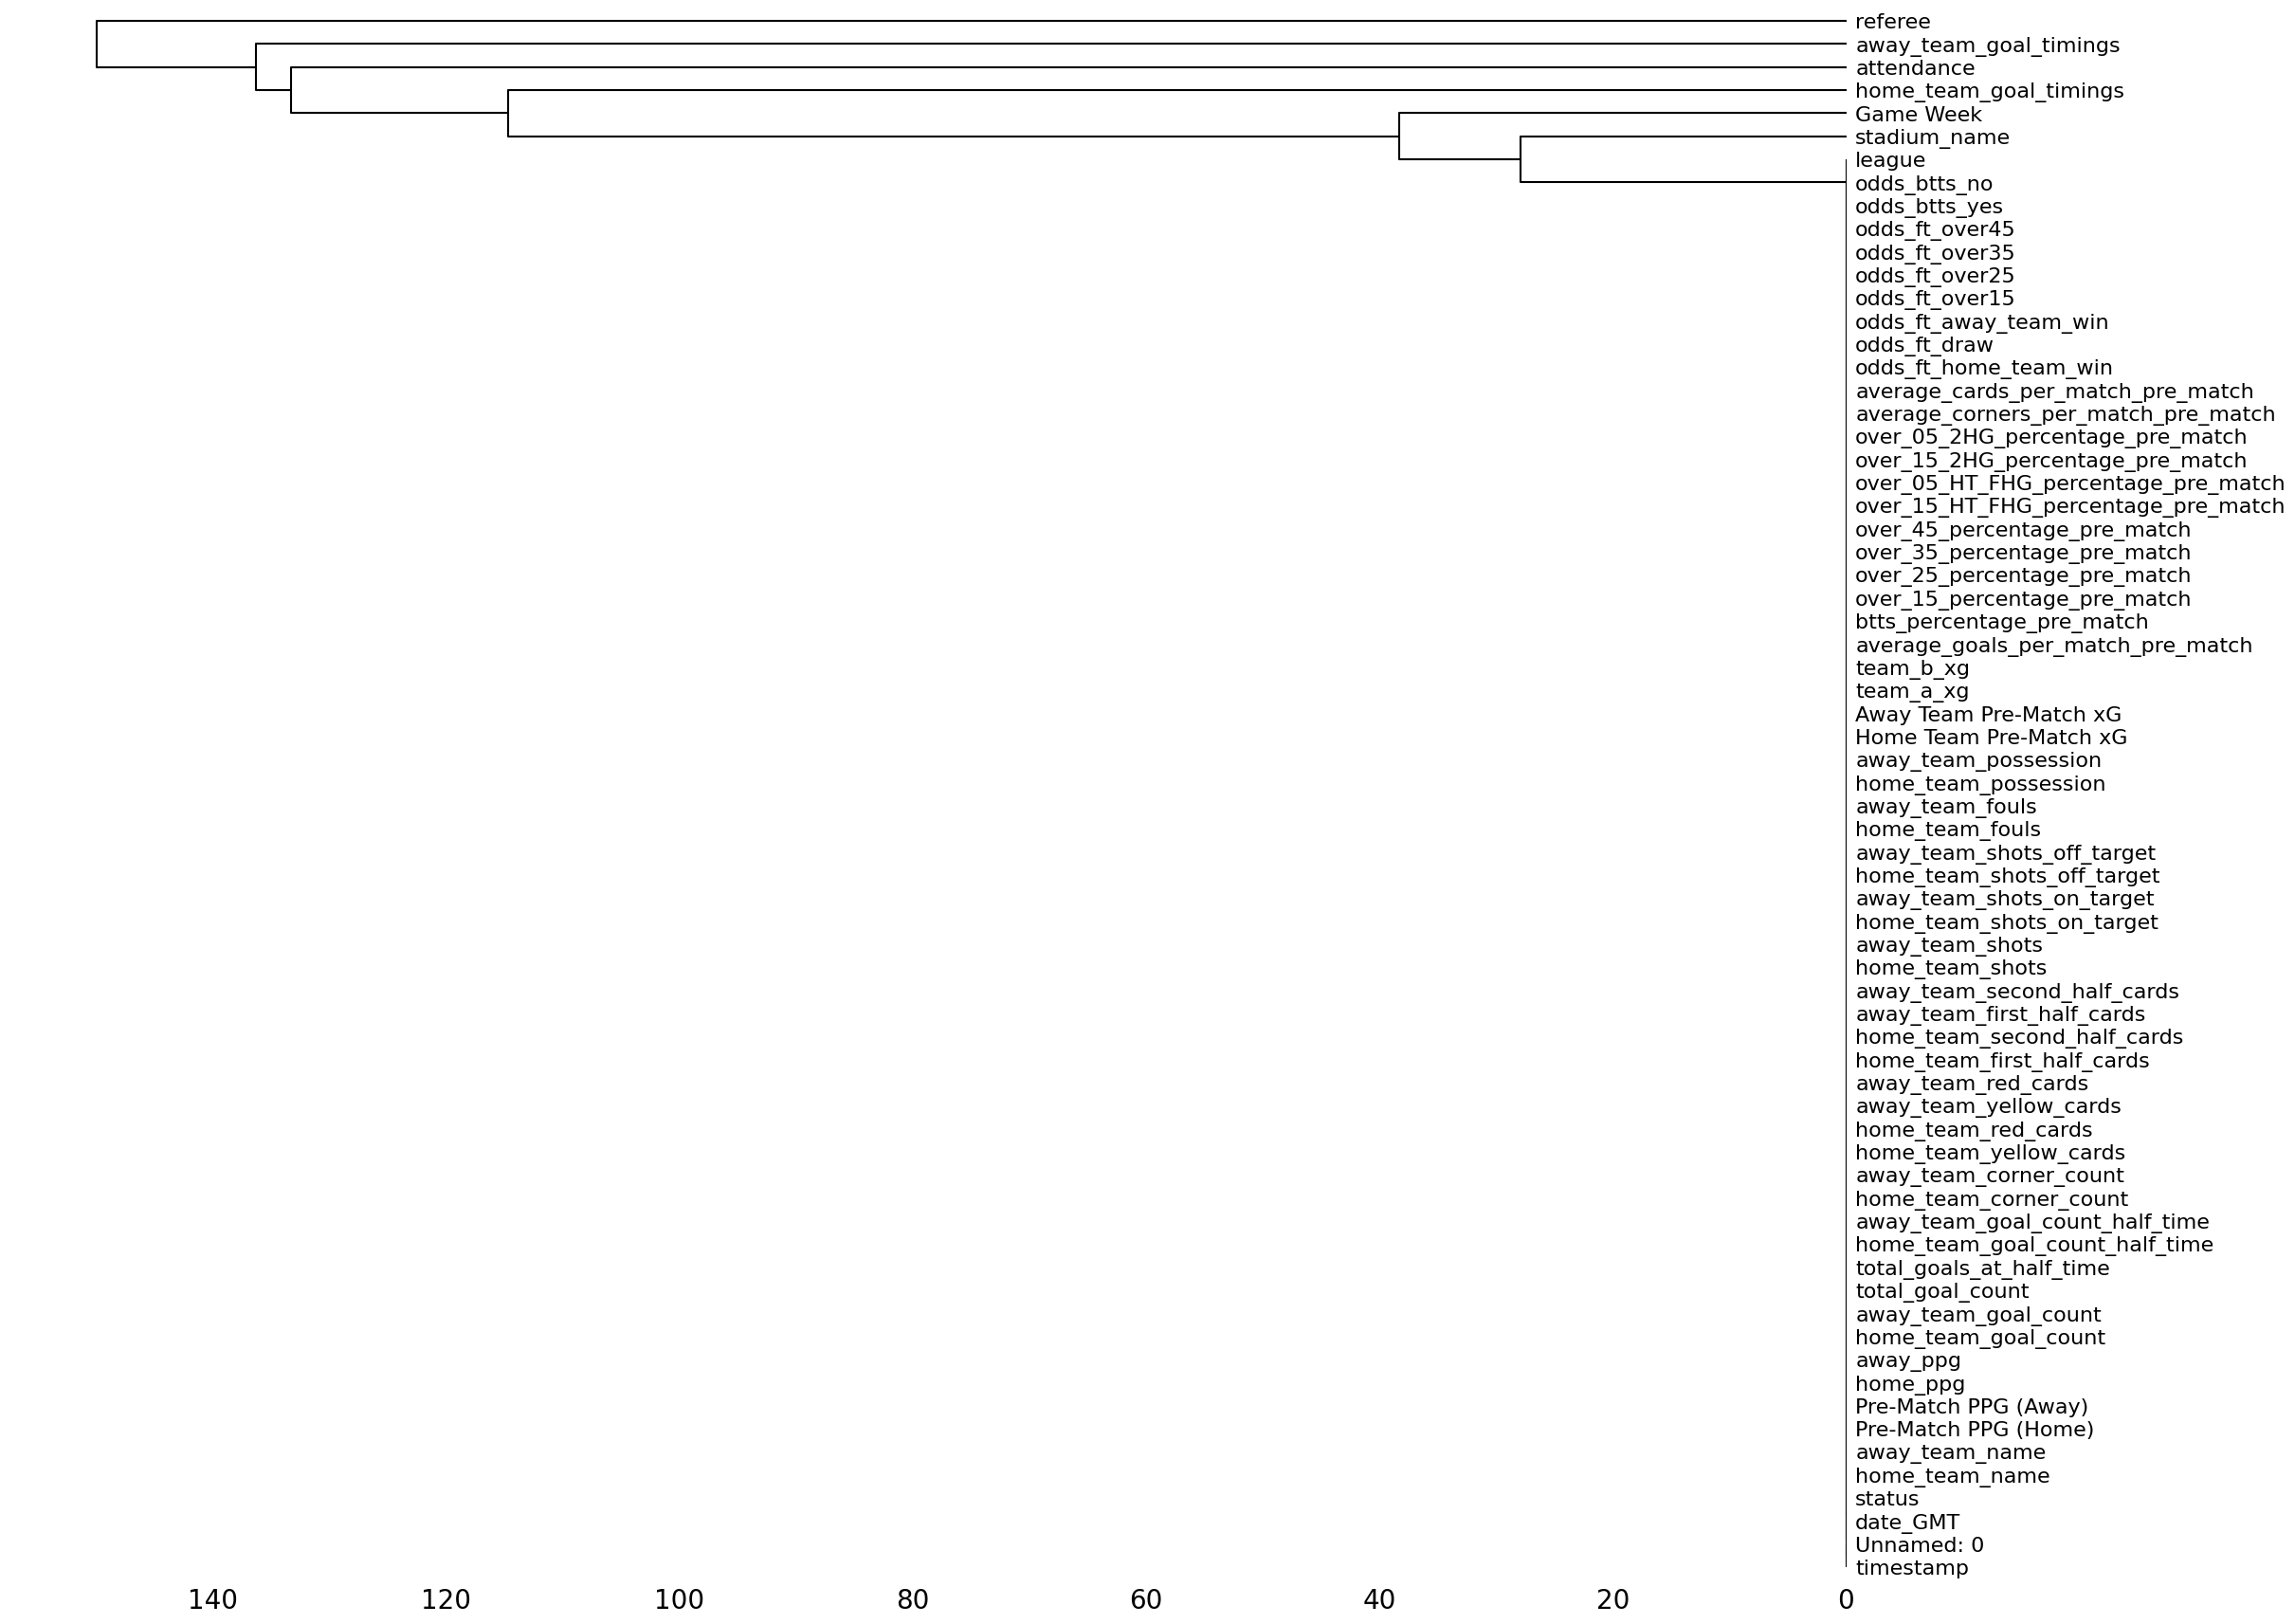

In [57]:
missingno.dendrogram(data)

# Data tidying

Simple pipeline-ish method for cleaning data.

In [58]:
def clean_data(data):
    #transforming date variable
    data['date_GMT'] = pd.to_datetime(data['date_GMT'])
    data['date'] = pd.to_datetime(data['date_GMT'].dt.date)
    data['time'] = data['date_GMT'].dt.time
    
    #adding aggregated variables
    data['corners_total'] = data['home_team_corner_count'] + data['away_team_corner_count']
    data['yellow_cards_total'] = data['home_team_yellow_cards'] + data['away_team_yellow_cards']
    data['red_cards_total'] = data['home_team_red_cards'] + data['away_team_red_cards']
    data['cards_total'] = data['yellow_cards_total'] + data['red_cards_total']
    data['shots_total'] = data['home_team_shots'] + data['away_team_shots']
    data['shots_on_target_total'] = data['home_team_shots_on_target'] + data['away_team_shots_on_target']
    data['shots_off_target_total'] = data['home_team_shots_off_target'] + data['away_team_shots_off_target']
    data['fouls_total'] = data['home_team_fouls'] + data['away_team_fouls']
    
    #getting stadium names without city in brackets
    # data['base_name'] = data['stadium_name'].str.replace(r" \(.*\)$", "", regex=True)

    # city_map = data[data['stadium_name'].str.contains(r"\(.*\)")].copy()
    # city_map['city'] = city_map['stadium_name'].str.extract(r"\((.*?)\)")[0]
    # city_map = city_map.groupby('base_name')['city'].agg(pd.Series.mode).to_dict()

    # #filling stadium names without city in brackets
    # data['normalized_stadium'] = data.apply(lambda row: f"{row['base_name']} ({city_map.get(row['base_name'], 'Unknown')})" if '(' not in row['stadium_name'] else row['stadium_name'], axis=1)

    #dropping unnecessary features
    data.drop(['Unnamed: 0', 'timestamp', 'status', 'home_team_goal_timings', 'away_team_goal_timings', 'date_GMT'], axis=1, inplace=True)
    
    #setting one of the target variable - result of the game
    data['result'] = np.where(data['home_team_goal_count'] == data['away_team_goal_count'], 0, np.where(data['home_team_goal_count'] > data['away_team_goal_count'], 1, 2))
    
    def assign_season(date):
        year = date.year
        if date.month >= 8:  # Sezon zaczyna się w sierpniu
            return f'{str(year)[2:]}/{str(year+1)[2:]}'
        else:
            return f'{str(year-1)[2:]}/{str(year)[2:]}'
    
    data['season'] = data['date'].apply(assign_season)
    
    return data

In [59]:
data = clean_data(data)

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_19332\694537563.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date_GMT'] = pd.to_datetime(data['date_GMT'])


In [ ]:
"""
flow do czyszczenia danych:
- wstawienie braków (tyle ile możliwe): średnia frekwencja w sezonie według stadionu, uzupełnienie numeru kolejki, normalizacja nazw stadionów i pytanie co z sędziami
"""

In [60]:
data.shape

(56249, 74)

In [61]:
data_clean = data[~(data == -1).any(axis=1)]

In [62]:
data_clean.shape

(45431, 74)

In [63]:
data_clean.sort_values(by='season')

,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,league,date,time,corners_total,yellow_cards_total,red_cards_total,cards_total,shots_total,shots_on_target_total,shots_off_target_total,fouls_total,result,season
33532,12562.0,Auxerre,Sochaux,Ruddy Buquet,1.0,0.00,0.00,2.00,0.84,0,1,1,1,0,1,6,10,0,0,2,1,0,0,0,3,15,17,3,5,12,12,17,10,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Stade de l'Abbé Deschamps (Auxerre),ligue 1,2009-08-08,19:00:00,16,2,1,3,32,8,24,27,2,09/10
306,NaN,Bayern München,Wolfsburg,Thorsten Kinhöfer,1.0,0.00,0.00,2.41,1.00,2,1,3,1,1,0,9,3,1,0,3,0,1,0,1,2,18,12,6,6,12,6,6,25,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Allianz Arena (München),bundesliga,2010-08-20,18:30:00,12,4,0,4,30,12,18,31,1,10/11
48332,NaN,Bari 1908,Juventus,Luca Banti,1.0,0.00,0.00,0.63,1.47,1,0,1,1,1,0,7,4,1,0,2,0,0,1,1,1,21,19,6,3,15,16,14,12,58,42,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Stadio Comunale San Nicola (Bari),serie a,2010-08-29,16:00:00,11,3,0,3,40,9,31,26,1,10/11
48331,NaN,Roma,Cesena,Gabriele Gava,1.0,0.00,0.00,2.00,0.89,0,0,0,0,0,0,10,8,3,0,3,0,0,3,0,3,25,14,6,4,19,10,11,17,64,36,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Stadio Olimpico (Roma),serie a,2010-08-28,18:45:00,18,6,0,6,39,10,29,28,0,10/11
48330,NaN,Udinese,Genoa,Gianluca Rocchi,1.0,0.00,0.00,1.95,0.95,0,1,1,0,0,0,9,3,2,0,3,0,0,2,3,0,15,10,7,5,8,5,12,15,47,53,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Bluenergy Stadium (Udine),serie a,2010-08-28,16:00:00,12,5,0,5,25,12,13,27,2,10/11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33385,NaN,FC Arouca,Benfica,Rui Manuel Gomes Costa,18.0,1.78,2.44,1.88,2.41,0,3,3,1,0,1,3,3,3,0,1,0,0,3,0,1,8,7,0,4,8,3,10,11,39,61,1.42,1.84,0.59,1.28,2.61,22,62,50,28,17,44,67,33,84,11.78,5.66,8.50,5.20,1.30,1.20,1.61,2.60,4.50,1.95,1.73,Estádio Municipal de Arouca (Arouca),liga nos,2023-01-31,21:15:00,6,4,0,4,15,4,11,21,2,22/23
33384,NaN,Paços de Ferreira,Gil Vicente,NaN,18.0,0.20,0.88,0.65,0.76,2,1,3,1,1,0,11,12,2,0,2,0,0,2,1,1,21,14,7,6,14,8,14,12,39,61,1.60,1.43,1.99,1.76,2.77,58,78,58,37,5,29,74,55,67,10.75,5.50,2.85,3.15,2.43,1.38,2.14,3.80,7.75,1.95,1.80,Estádio da Capital do Móvel (Paços de Ferreira),liga nos,2023-01-31,19:00:00,23,4,0,4,35,13,22,

In [64]:
data_clean.isna().sum()

attendance                             14012
home_team_name                             0
away_team_name                             0
referee                                18793
Game Week                                130
Pre-Match PPG (Home)                       0
Pre-Match PPG (Away)                       0
home_ppg                                   0
away_ppg                                   0
home_team_goal_count                       0
away_team_goal_count                       0
total_goal_count                           0
total_goals_at_half_time                   0
home_team_goal_count_half_time             0
away_team_goal_count_half_time             0
home_team_corner_count                     0
away_team_corner_count                     0
home_team_yellow_cards                     0
home_team_red_cards                        0
away_team_yellow_cards                     0
away_team_red_cards                        0
home_team_first_half_cards                 0
home_team_

In [66]:
# Pierwsze wypełnienie: średnia dla gospodarza i sezonu
data_clean['attendance'] = data_clean['attendance'].fillna(data_clean.groupby(['home_team_name', 'season'])['attendance'].transform('mean'))

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_19332\550212674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['attendance'] = data_clean['attendance'].fillna(data_clean.groupby(['home_team_name', 'season'])['attendance'].transform('mean'))


In [68]:
data_clean['attendance'].isna().sum()

7111

In [70]:
# Drugie wypełnienie: średnia dla ligi i sezonu
data_clean['attendance'] = data_clean['attendance'].fillna(data_clean.groupby(['league', 'season'])['attendance'].transform('mean'))

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_19332\2624684561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['attendance'] = data_clean['attendance'].fillna(data_clean.groupby(['league', 'season'])['attendance'].transform('mean'))


In [71]:
data_clean['attendance'].isna().sum()

3788

In [75]:
# Trzecie wypełnienie: średnia dla ligi na przestzeni całego datasetu
data_clean['attendance'] = data_clean['attendance'].fillna(data_clean.groupby(['league'])['attendance'].transform('mean'))

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_19332\2803264831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['attendance'] = data_clean['attendance'].fillna(data_clean.groupby(['league'])['attendance'].transform('mean'))


In [76]:
data_clean['attendance'].isna().sum()

0

In [77]:
data_clean.isna().sum()

attendance                                 0
home_team_name                             0
away_team_name                             0
referee                                18793
Game Week                                130
Pre-Match PPG (Home)                       0
Pre-Match PPG (Away)                       0
home_ppg                                   0
away_ppg                                   0
home_team_goal_count                       0
away_team_goal_count                       0
total_goal_count                           0
total_goals_at_half_time                   0
home_team_goal_count_half_time             0
away_team_goal_count_half_time             0
home_team_corner_count                     0
away_team_corner_count                     0
home_team_yellow_cards                     0
home_team_red_cards                        0
away_team_yellow_cards                     0
away_team_red_cards                        0
home_team_first_half_cards                 0
home_team_